In [19]:
import numpy as np

import matplotlib.pyplot as plt

## Array of strings

In [34]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [39]:
first_letter_B = np.vectorize(lambda x: x[0])(names)
first_letter_B

array(['B', 'J', 'W', 'B', 'W', 'J', 'J'], dtype='<U1')

## Calculus and Statistics

In [40]:
a = 2*np.random.randn(10000) + 10

In [41]:
a.mean()

9.984830291989784

In [42]:
a.std()

2.006441909381562

In [44]:
np.percentile(a, 50)

9.981648399073308

In [53]:
x = np.linspace(1, 10, 100)
y = 1/x**2 * np.sin(x)

# Calcualte the derivative and integral of y
dydx = np.gradient(y, x)
y_integral = np.cumsum(y) * (x[1] - x[0]) # last part is dx

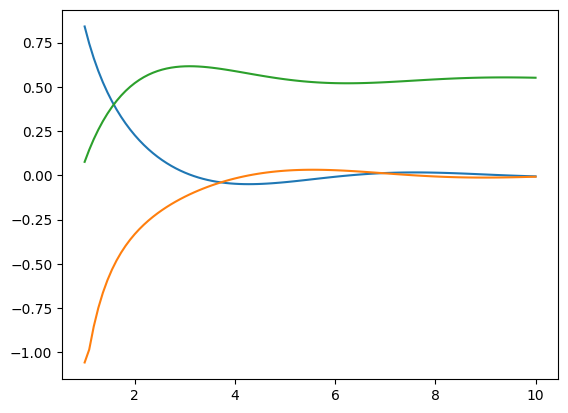

In [55]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, y_integral)

## Examples

### Question 1

In [58]:
x = np.linspace(0, 10, 10000+1)
y = np.exp(-x/10) * np.sin(x)

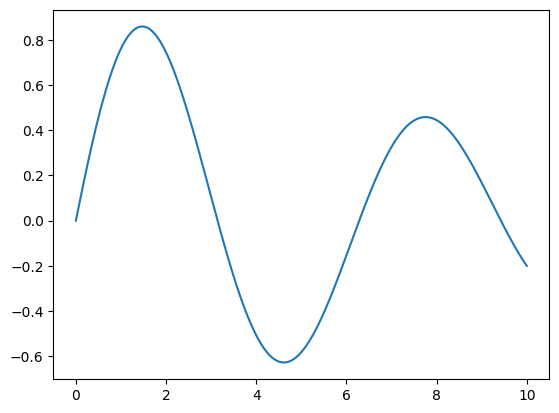

In [59]:
plt.plot(x, y)

In [67]:
y[(x>=4)*(x<=7)].mean()

-0.2956023068963138

In [68]:
y[(x>=4)*(x<=7)].std()

0.31448753875085117

In [69]:
np.percentile(y[(x>=4)*(x<=7)], 80)

0.06145551274590662

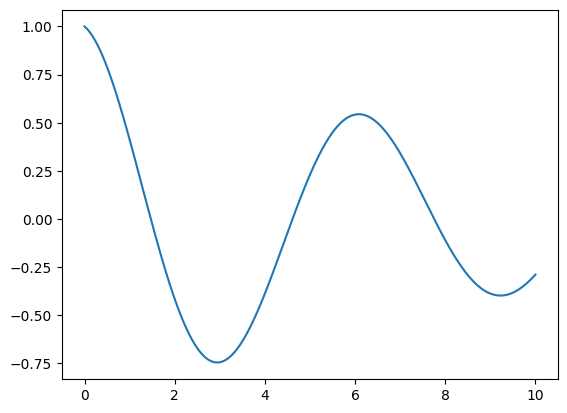

In [71]:
dxdy = np.gradient(y, x)
plt.plot(x, dxdy)

In [75]:
# Roots of the derivative
next = dxdy[1:]
prev = dxdy[:-1]

x[1:][next * prev < 0]

array([1.472, 4.613, 7.755])

### Question 2

In [95]:
nums = np.arange(0, 10001)
nums[(nums%4 != 0) * (nums%7 != 0)].sum()

32147142

In [99]:
np.array([True, False, False]) + np.array([True, True, False])

array([ True,  True, False])

### Question 3

In [104]:
theta = np.linspace(0, 2*np.pi, 1000)
r = 1 + 3/4 * np.sin(3*theta)

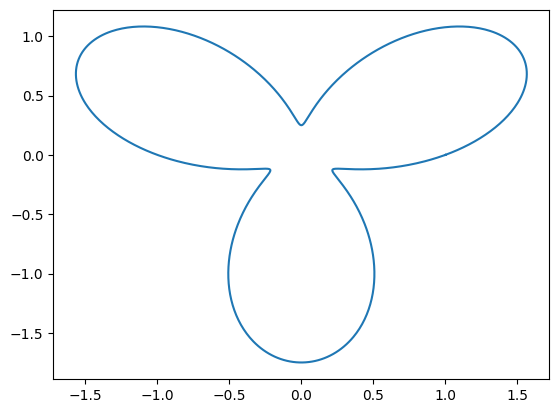

In [106]:
# Make a flower plot
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x, y)

$$ \int_0^{2\pi} \frac{1}{2} r^2 d\theta

In [112]:
# Integrate the area
A = 1/2 * np.sum(r**2) * (theta[1] - theta[0])
A

4.028310324802903

$$ \int_0^{2\pi} \sqrt{r^2 + (\frac{dr}{d\theta}})^2 d\theta

In [115]:
L = np.sum(np.sqrt(r**2 + np.gradient(r, theta)**2) * (theta[1] - theta[0]))
L

11.640021569013864

## Matrixes

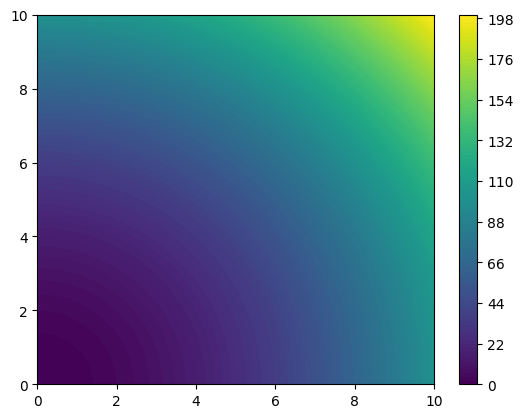

In [122]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Create 2 varable function
zv = xv**2 + yv**2

# Plot contour
plt.contourf(xv, yv, zv, levels=100)
plt.colorbar()

In [150]:
A = np.array([[1, 2], [3, 4]])
b = np.array([1, 2])

np.array_equal(A @ b, np.matmul(A, b)), np.array_equal(A @ b, np.dot(A, b))

(True, True)

In [152]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [3, 4]])

np.array_equal(A @ B, np.matmul(A, B)), np.array_equal(A @ B, np.dot(A, B))

(True, True)

### Systems of Linear Equations
$$ 3x + 2y + z = 4 $$
$$ 5x - 5y + 4z = 3 $$
$$ 6x + z = 0 $$

In [153]:
A = np.array([[3,2,1], [5, -5, 4], [6, 0, 1]])
c = np.array([4,3,0])

In [154]:
np.linalg.solve(A, c)

array([-0.49056604,  1.26415094,  2.94339623])

### Eigen Values and Eigen Vectors

In [156]:
A = np.array([[4,2,2], [2,4,2], [2,2,4]])

In [159]:
vals, vecs = np.linalg.eig(A)

In [160]:
# First eigen vector is the first column not the first row
vecs[:,0] 

array([-0.81649658,  0.40824829,  0.40824829])

In [169]:
A @ vecs[:,0]

array([-1.63299316,  0.81649658,  0.81649658])

In [170]:
vals[0] * vecs[:,0]

array([-1.63299316,  0.81649658,  0.81649658])

### Queston 1

In [171]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

In [177]:
xv, yv = np.meshgrid(x, y)

f = np.exp(-xv**2 - yv**2) * np.sin(xv)

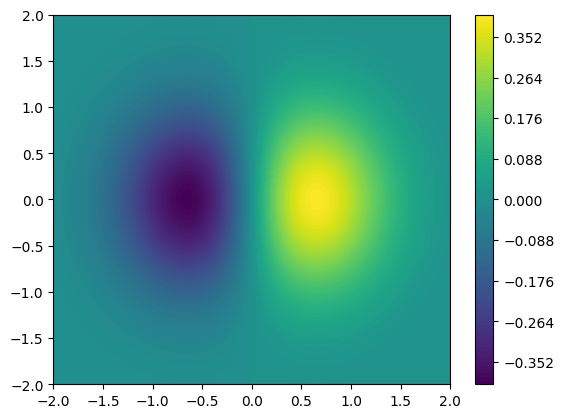

In [178]:
plt.contourf(xv, yv, f, levels=100)
plt.colorbar()

In [186]:
# Double integral of |f| with respect to x and y
# dx = np.diff(x)[0] == x[1] - x[0]
np.abs(f.ravel()).sum() * np.diff(x)[0] * np.diff(y)[0] # Last part is dxdy

1.4861858145124311

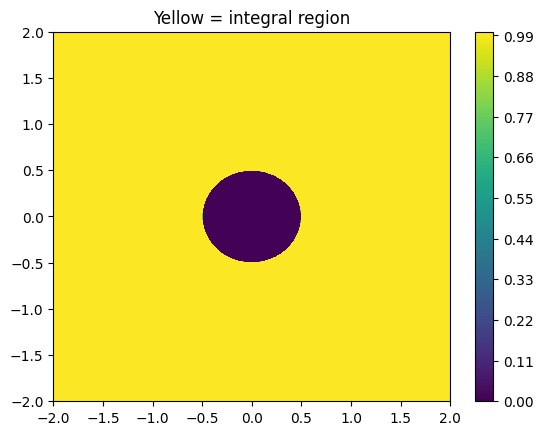

In [190]:
# Double integral of |f| with respect to x and y where np.sqrt(x**2 + y**2) > 0.5
region = xv**2 + yv**2 > 0.5**2

plt.contourf(xv, yv, region, levels=100)
plt.title('Yellow = integral region')
plt.colorbar()

In [191]:
np.abs(f[region].ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.3447652930203164